In [358]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [359]:
# Declaring the path as global variable
PATH_MAIN = r"./../Dataset/"
PATH_18 = os.path.join(PATH_MAIN, r"IT Salary Survey EU 2018.csv")
PATH_19 = os.path.join(PATH_MAIN, r"IT Salary Survey EU 2019.csv")
PATH_20 = os.path.join(PATH_MAIN, r"IT Salary Survey EU 2020.csv")

In [360]:
# Getting the dataset (csv file) into the script
data_18 = pd.read_csv(PATH_18)
data_19 = pd.read_csv(PATH_19)
data_20 = pd.read_csv(PATH_20)

In [361]:
temp_18 = data_18.dtypes.to_frame().reset_index()
temp_18.rename(columns={"index": "Column", 0: "Dtype"}, inplace=True)
num_col_18 = temp_18[temp_18.Dtype != 'object']

Text(0.5, 1.0, 'Column Correlation on Data 2018')

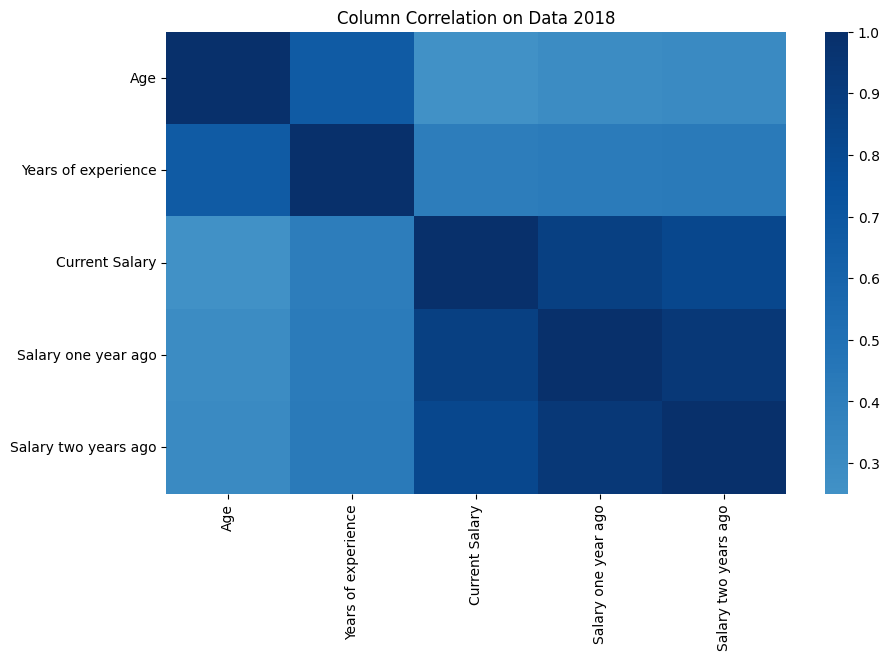

In [362]:
cor_data_18 = data_18[num_col_18.Column].corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cor_data_18, center=0, cmap='Blues')
ax.set_title("Column Correlation on Data 2018")

In [363]:
temp_19 = data_19.dtypes.to_frame().reset_index()
temp_19.rename(columns={"index": "Column", 0: "Dtype"}, inplace=True)
num_col_19 = temp_19[temp_19.Dtype != 'object']

Text(0.5, 1.0, 'Column Correlation on Data 2019')

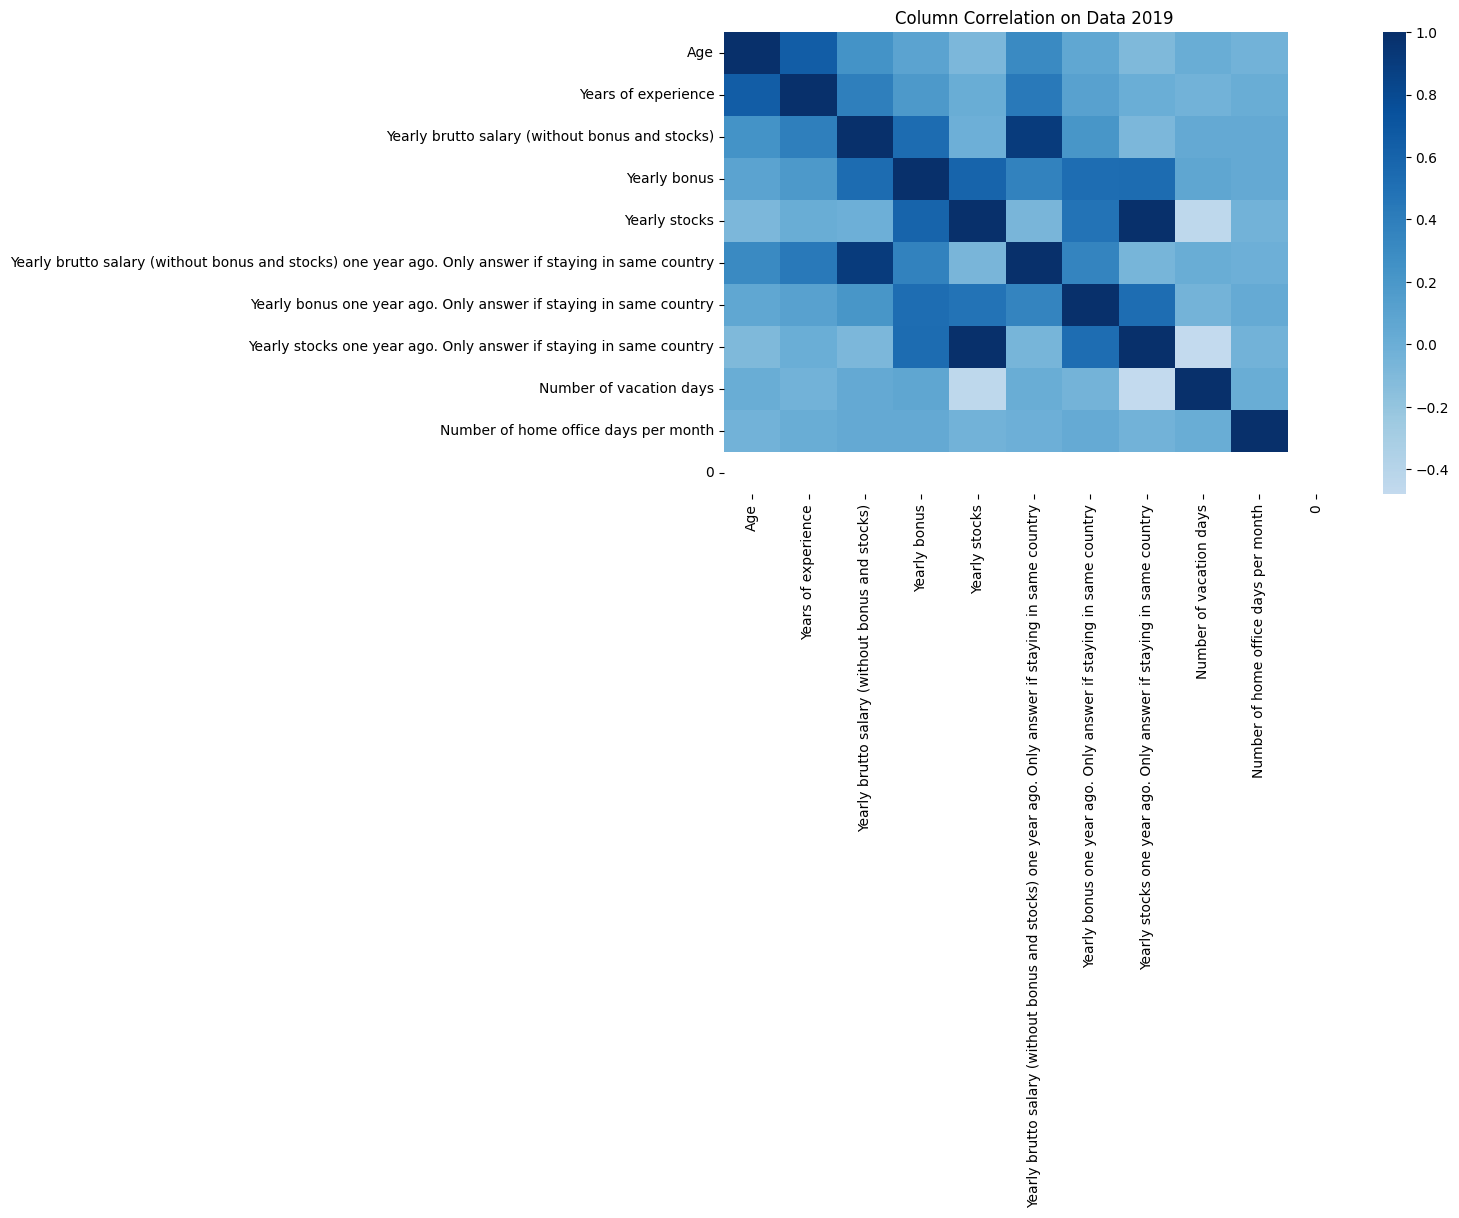

In [364]:
cor_data_19 = data_19[num_col_19.Column].corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cor_data_19, center=0, cmap='Blues')
ax.set_title("Column Correlation on Data 2019")

In [365]:
temp_20 = data_20.dtypes.to_frame().reset_index()
temp_20.rename(columns={"index": "Column", 0: "Dtype"}, inplace=True)
num_col_20 = temp_20[temp_20.Dtype != 'object']

Text(0.5, 1.0, 'Column Correlation on Data 2020')

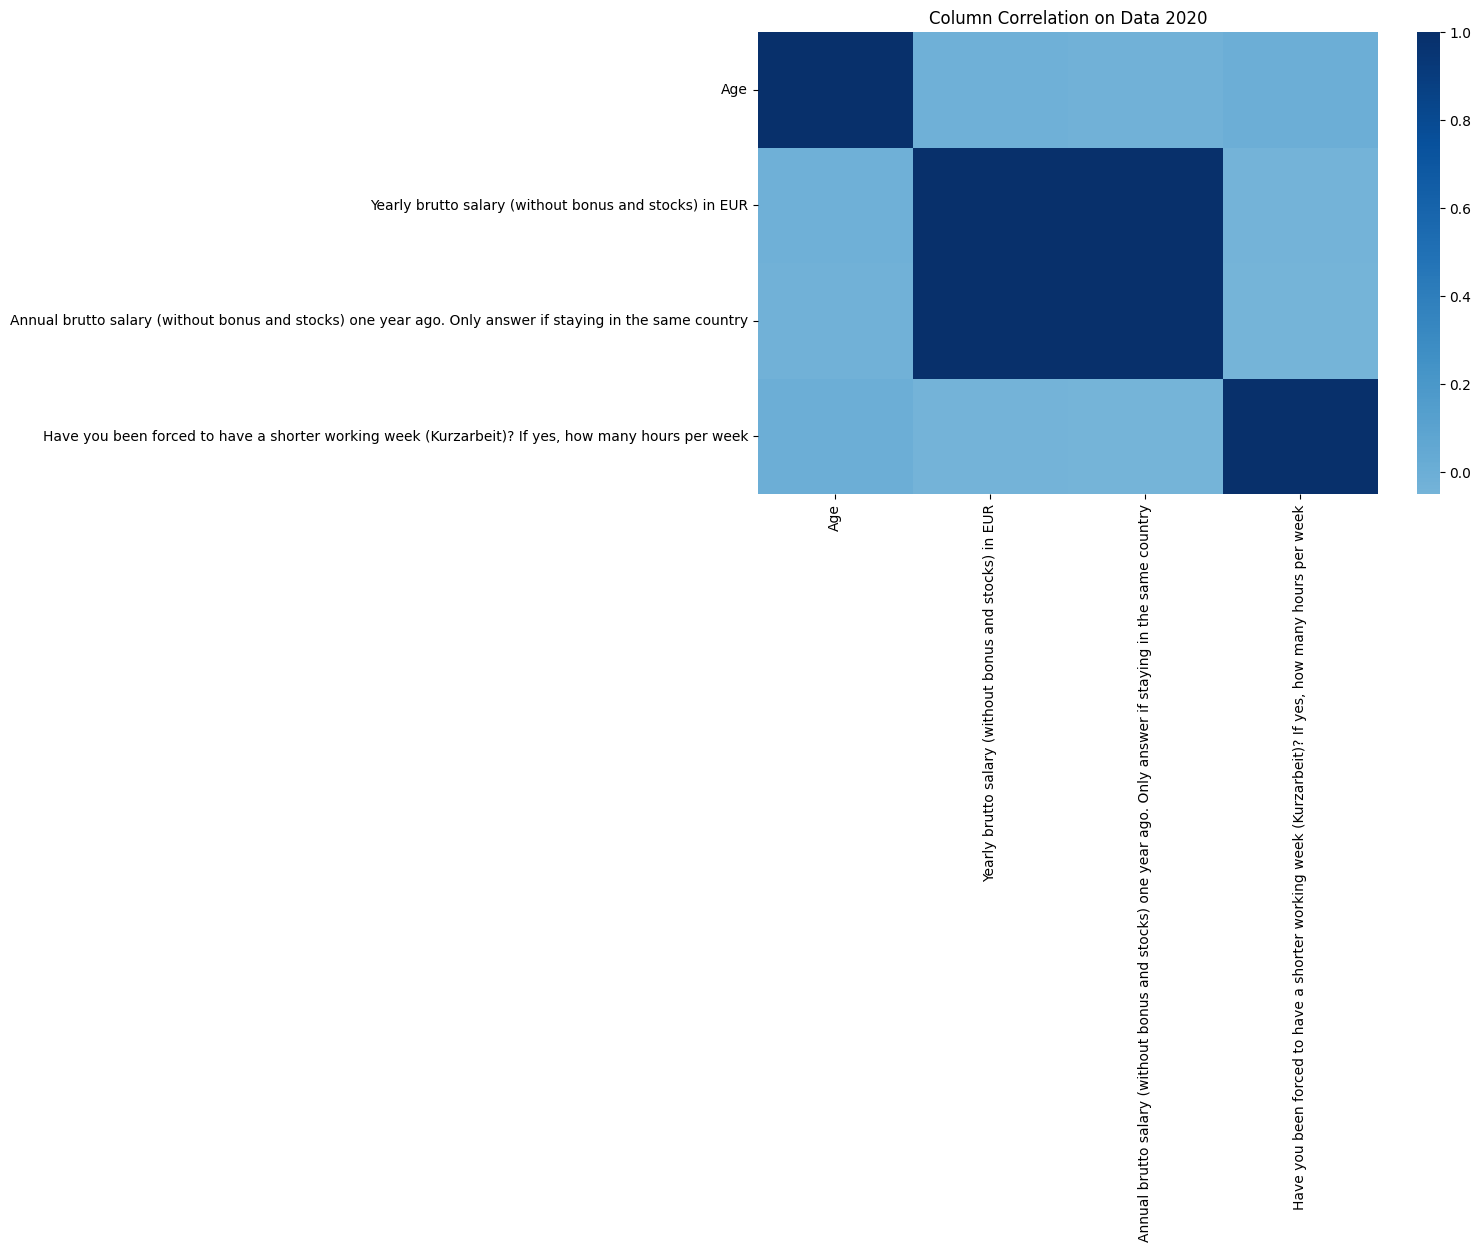

In [366]:
cor_data_20 = data_20[num_col_20.Column].corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cor_data_20, center=0, cmap='Blues')
ax.set_title("Column Correlation on Data 2020")

### Cleaning Null

In [367]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
modus_imputer = SimpleImputer(strategy='most_frequent')

In [368]:
data_18.isna().sum()

Timestamp                               0
Age                                    93
Gender                                 14
City                                   29
Position                               28
Years of experience                    33
Your level                             22
Current Salary                         15
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                  15
Company size                           15
Company type                           35
dtype: int64

In [369]:
data_18["Your level"].value_counts()

Your level
Senior    497
Middle    206
Junior     40
Name: count, dtype: int64

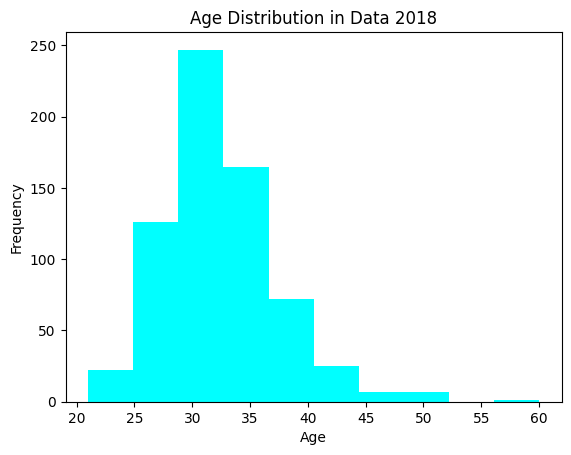

In [370]:
plt.hist(list(data_18.Age), color='cyan')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Data 2018")
plt.show()

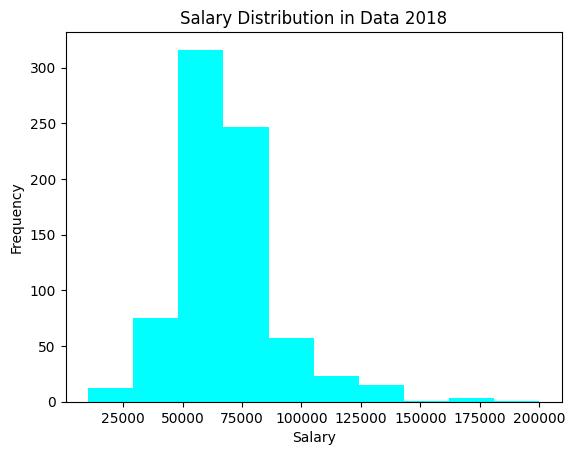

In [371]:
plt.hist(list(data_18["Current Salary"]), color='cyan')
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution in Data 2018")
plt.show()

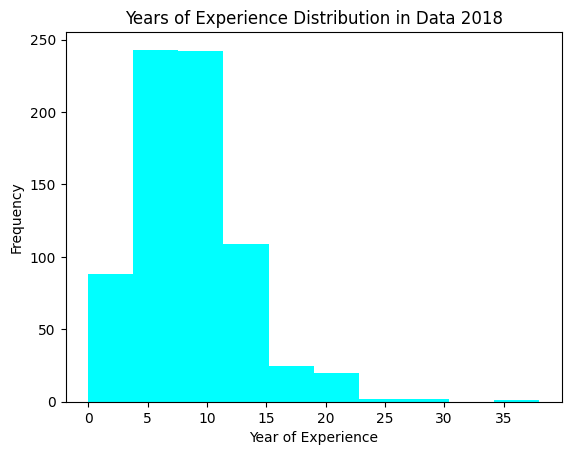

In [372]:
plt.hist(list(data_18["Years of experience"]), color='cyan')
plt.xlabel("Year of Experience")
plt.ylabel("Frequency")
plt.title("Years of Experience Distribution in Data 2018")
plt.show()

In [373]:
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 672 non-null    float64
 2   Gender                              751 non-null    object 
 3   City                                736 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 732 non-null    float64
 6   Your level                          743 non-null    object 
 7   Current Salary                      750 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               750 non-n

In [374]:
data_18[["Age"]] = median_imputer.fit_transform(data_18[["Age"]])
data_18[["Current Salary"]] = median_imputer.fit_transform(data_18[["Current Salary"]])
data_18[["Years of experience"]] = median_imputer.fit_transform(data_18[["Years of experience"]])

In [375]:
data_18[["Gender"]] = modus_imputer.fit_transform(data_18[["Gender"]])
data_18[["City"]] = modus_imputer.fit_transform(data_18[["City"]])
data_18[["Company size"]] = modus_imputer.fit_transform(data_18[["Company size"]])
data_18[["Company type"]] = modus_imputer.fit_transform(data_18[["Company type"]])

In [376]:
data_18["Position"].fillna("-", inplace=True)
data_18["Main language at work"].fillna("Others", inplace=True)
data_18["Your level"].fillna("Others", inplace=True)

In [377]:
data_18.isna().sum()

Timestamp                               0
Age                                     0
Gender                                  0
City                                    0
Position                                0
Years of experience                     0
Your level                              0
Current Salary                          0
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                   0
Company size                            0
Company type                            0
dtype: int64

In [378]:
data_18["Age"] = data_18["Age"].astype('int')
data_18["Years of experience"] = data_18["Years of experience"].astype('int')
data_18[num_col_18.Column].head(5)

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
0,43,11,77000.0,76200.0,68000.0
1,33,8,65000.0,55000.0,55000.0
2,32,10,88000.0,73000.0,54000.0
3,25,6,78000.0,55000.0,45000.0
4,39,10,69000.0,60000.0,52000.0


In [379]:
data_19.isna().sum()

Zeitstempel                                                                                               0
Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                

In [380]:
data_19["Company business sector"].value_counts()

Company business sector
Сommerce                   205
Finance / Insurance        163
Transport                   86
Manufacture                 53
IT                          44
Health                      37
Tourism                     36
Software Development        30
Scientific Activities       24
Telecom                     19
Media                       13
Real Estate                 12
Automotive                  12
Education                   10
Advertising                  9
Catering                     9
Gaming                       9
Сonstruction                 8
IoT                          5
Agriculture                  5
HR                           5
Entertainment                4
Dating                       4
Marketing                    4
Logistics                    3
Security                     3
Fashion                      3
Customer Support             2
Consulting                   2
Cloud                        2
SEO                          2
Gambling       

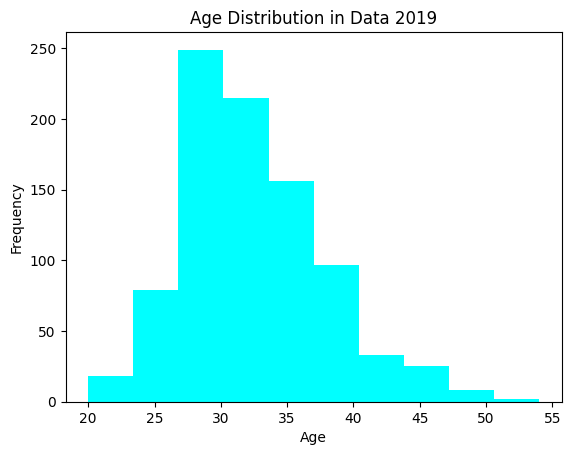

In [381]:
plt.hist(list(data_19.Age), color='cyan')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Data 2019")
plt.show()

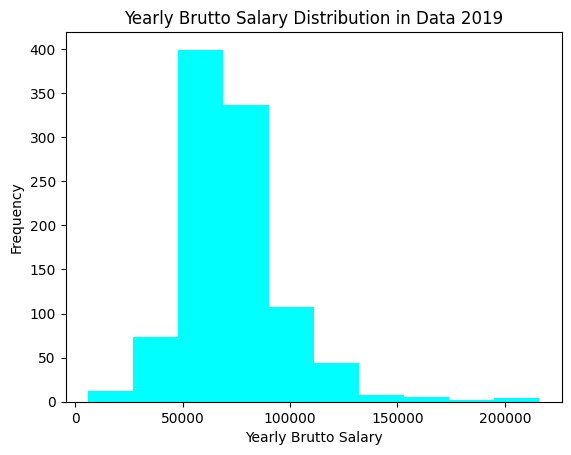

In [382]:
plt.hist(list(data_19["Yearly brutto salary (without bonus and stocks)"]), color='cyan')
plt.xlabel("Yearly Brutto Salary")
plt.ylabel("Frequency")
plt.title("Yearly Brutto Salary Distribution in Data 2019")
plt.show()

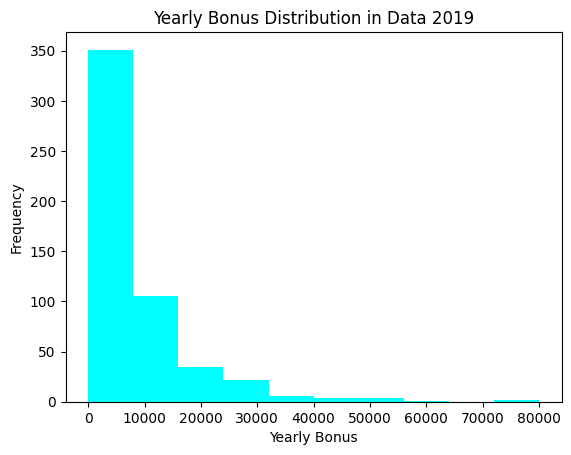

In [383]:
plt.hist(list(data_19["Yearly bonus"]), color='cyan')
plt.xlabel("Yearly Bonus")
plt.ylabel("Frequency")
plt.title("Yearly Bonus Distribution in Data 2019")
plt.show()

In [384]:
data_19.dtypes

Zeitstempel                                                                                              object
Age                                                                                                     float64
Gender                                                                                                   object
City                                                                                                     object
Seniority level                                                                                          object
Position (without seniority)                                                                             object
Years of experience                                                                                       int64
Your main technology / programming language                                                              object
Yearly brutto salary (without bonus and stocks)                                                         

In [385]:
data_19[["Age"]] = median_imputer.fit_transform(data_19[["Age"]])
data_19[["Yearly brutto salary (without bonus and stocks)"]] = median_imputer.fit_transform(data_19[["Yearly brutto salary (without bonus and stocks)"]])
data_19[["Yearly bonus"]] = median_imputer.fit_transform(data_19[["Yearly bonus"]])

In [386]:
data_19[["Company size"]] = modus_imputer.fit_transform(data_19[["Company size"]])
data_19[["Company type"]] = modus_imputer.fit_transform(data_19[["Company type"]])

In [387]:
data_19["Position (without seniority)"].fillna("Others", inplace=True)
data_19["Your main technology / programming language"].fillna("Others", inplace=True)
data_19["Main language at work"].fillna("Others", inplace=True)
data_19["Seniority level"].fillna("Others", inplace=True)
data_19["Company business sector"].fillna("Others", inplace=True)

In [388]:
data_19.isna().sum()

Zeitstempel                                                                                               0
Age                                                                                                       0
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                           0
Position (without seniority)                                                                              0
Years of experience                                                                                       0
Your main technology / programming language                                                               0
Yearly brutto salary (without bonus and stocks)                                                           0
Yearly bonus                

In [389]:
data_20.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [390]:
data_20["Company size"].value_counts()

Company size
1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: count, dtype: int64

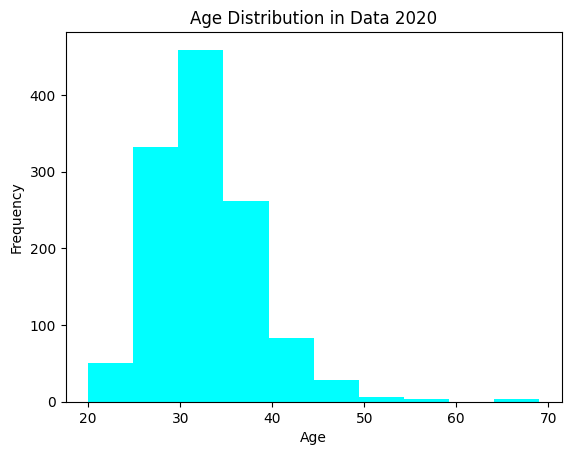

In [391]:
plt.hist(list(data_20.Age), color='cyan')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Data 2020")
plt.show()

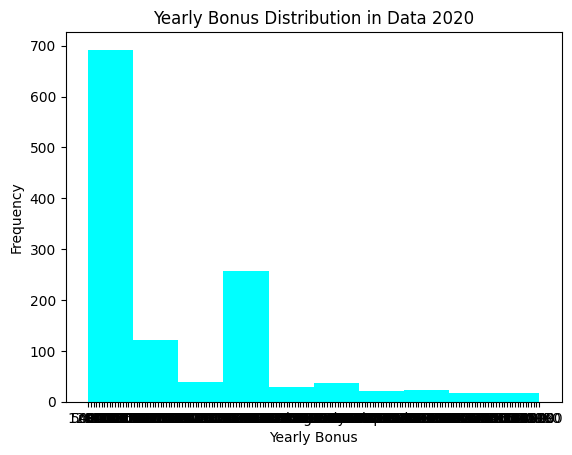

In [392]:
plt.hist(list(data_20["Yearly bonus + stocks in EUR"]), color='cyan')
plt.xlabel("Yearly Bonus")
plt.ylabel("Frequency")
plt.title("Yearly Bonus Distribution in Data 2020")
plt.show()

In [393]:
data_20.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

In [394]:
data_20[["Age"]] = median_imputer.fit_transform(data_20[["Age"]])

In [395]:
data_20[["Gender"]] = modus_imputer.fit_transform(data_20[["Gender"]])
data_20[["Total years of experience"]] = modus_imputer.fit_transform(data_20[["Total years of experience"]])
data_20[["Company size"]] = modus_imputer.fit_transform(data_20[["Company size"]])
data_20[["Company type"]] = modus_imputer.fit_transform(data_20[["Company type"]])

In [396]:
data_20["Position "].fillna("Others", inplace=True)
data_20["Seniority level"].fillna("Others", inplace=True)
data_20["Your main technology / programming language"].fillna("Others", inplace=True)
data_20["Main language at work"].fillna("Others", inplace=True)

In [397]:
data_20["Gender"].replace(["Diverse"], 'Other', inplace=True)
data_20["Yearly bonus + stocks in EUR"].replace(["15000+-"], '15000', inplace=True)
data_20["Yearly bonus + stocks in EUR"].replace(["depends", 'bvg only', 'Na', '-', 'Not sure'], np.NaN, inplace=True)
data_20["Total years of experience"].replace(["6 (not as a data scientist, but as a lab scientist)"], '6', inplace=True)
data_20["Total years of experience"].replace(["15, thereof 8 as CTO"], '15', inplace=True)
data_20["Total years of experience"].replace(["1 (as QA Engineer) / 11 in total"], '11', inplace=True)
data_20["Total years of experience"].replace(["less than year"], '0.7', inplace=True)
data_20["Total years of experience"] = data_20["Total years of experience"].str.replace(',', '.')

In [398]:
data_20["Yearly bonus + stocks in EUR"] = data_20["Yearly bonus + stocks in EUR"].astype('float')
data_20["Total years of experience"] = data_20["Total years of experience"].astype('float')

In [399]:
data_20[["Yearly bonus + stocks in EUR"]] = median_imputer.fit_transform(data_20[["Yearly bonus + stocks in EUR"]])

In [400]:
data_20.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       0
City                                                                                                                         0
Position                                                                                                                     0
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [401]:
data_20.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                  float64
Years of experience in Germany                                                                                              object
Seniority level                                                                    

In [402]:
data_18.duplicated().sum()

0

In [403]:
data_19.duplicated().sum()

0

In [404]:
data_20.duplicated().sum()

0